In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_excel('/content/Processors.xlsx')

In [19]:
df.shape

(1021, 51)

In [20]:
df.duplicated().sum()
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1020
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Designer                             1020 non-null   object 
 1   Serie                                676 non-null    object 
 2   Type                                 1020 non-null   object 
 3   Codename                             235 non-null    object 
 4   Year Released                        1020 non-null   int64  
 5   Function                             1020 non-null   object 
 6   Width of Machine Word                1020 non-null   object 
 7   Supported Instruction Set(s)         1019 non-null   object 
 8   Type of processor core(s)            1014 non-null   object 
 9   Number of processor core(s)          1020 non-null   int64  
 10  Memory Interface(s)                  1020 non-null   object 
 11  Max. Clock Frequency of Memory IF  

In [22]:
nan_columns = df.isna().sum()
nan_columns

,0
Designer,0
Serie,344
Type,0
Codename,785
Year Released,0
Function,0
Width of Machine Word,0
Supported Instruction Set(s),1
Type of processor core(s),6
Number of processor core(s),0


In [23]:
nan_columns_over_700 = df.columns[df.isna().sum() > 700]
df = df.drop(columns=nan_columns_over_700)

In [24]:
num_cols = df.select_dtypes(include=np.number).columns
obj_cols = df.select_dtypes(include='object').columns

print(f'numbered: {num_cols} \n')
print(f'objective: {obj_cols}')

numbered: Index(['Year Released', 'Number of processor core(s)'], dtype='object') 

objective: Index(['Designer', 'Serie', 'Type', 'Function', 'Width of Machine Word',
       'Supported Instruction Set(s)', 'Type of processor core(s)',
       'Memory Interface(s)', 'Max. Clock Frequency of Memory IF',
       'Data Bus Width', 'Number of data bus channels',
       'Non-volatile Memory Interface', 'Recommended Maximum Clock Frequency',
       'Max. Data Rate', 'L1 Instruction Cache per Core',
       'L1 Data Cache per Core', 'Total L2 Cache', 'Feature Size',
       'Semiconductor Technology', 'Fab', 'Embedded GPU',
       'Number of GPU cores', 'GPU Clock', 'Supported Cellular Data Links',
       'Supported USB Specification', 'Bluetooth support',
       'Wireless LAN support', 'Supported Audio/Video Interface',
       'Supported GPS protocol(s)', 'Supported GLONASS protocol(s)',
       'Supported BeiDou system (BDS)', 'Special Features'],
      dtype='object')


In [25]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())
for col in obj_cols:
  df[col] = df[col].astype(str)
  df[col] = df[col].fillna(df[col].mode()[0])
print(df.isna().sum())

Designer                               0
Serie                                  0
Type                                   0
Year Released                          0
Function                               0
Width of Machine Word                  0
Supported Instruction Set(s)           0
Type of processor core(s)              0
Number of processor core(s)            0
Memory Interface(s)                    0
Max. Clock Frequency of Memory IF      0
Data Bus Width                         0
Number of data bus channels            0
Non-volatile Memory Interface          0
Recommended Maximum Clock Frequency    0
Max. Data Rate                         0
L1 Instruction Cache per Core          0
L1 Data Cache per Core                 0
Total L2 Cache                         0
Feature Size                           0
Semiconductor Technology               0
Fab                                    0
Embedded GPU                           0
Number of GPU cores                    0
GPU Clock       

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1020
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Designer                             1020 non-null   object
 1   Serie                                1020 non-null   object
 2   Type                                 1020 non-null   object
 3   Year Released                        1020 non-null   int64 
 4   Function                             1020 non-null   object
 5   Width of Machine Word                1020 non-null   object
 6   Supported Instruction Set(s)         1020 non-null   object
 7   Type of processor core(s)            1020 non-null   object
 8   Number of processor core(s)          1020 non-null   int64 
 9   Memory Interface(s)                  1020 non-null   object
 10  Max. Clock Frequency of Memory IF    1020 non-null   object
 11  Data Bus Width                       1020 non-nu

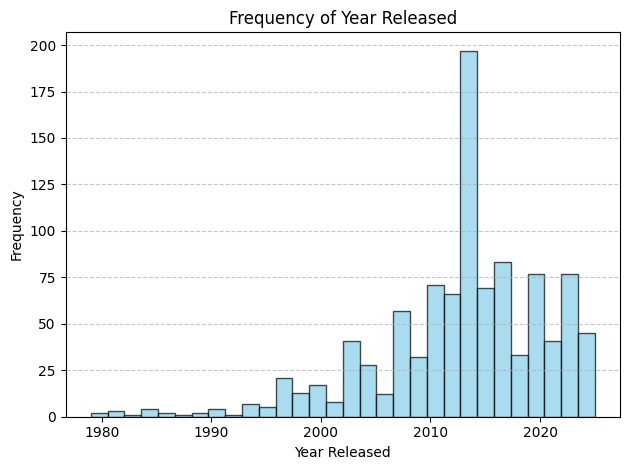

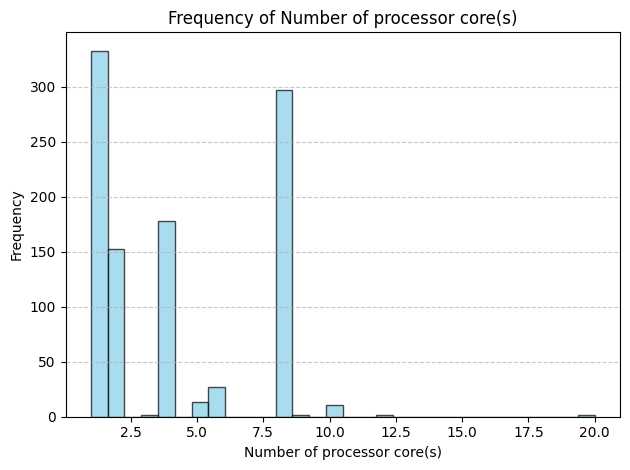

In [27]:
for col in num_cols:
  plt.hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
  plt.xlabel(col)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.ylabel('Frequency')
  plt.title(f'Frequency of {col}')
  plt.tight_layout()
  plt.show()

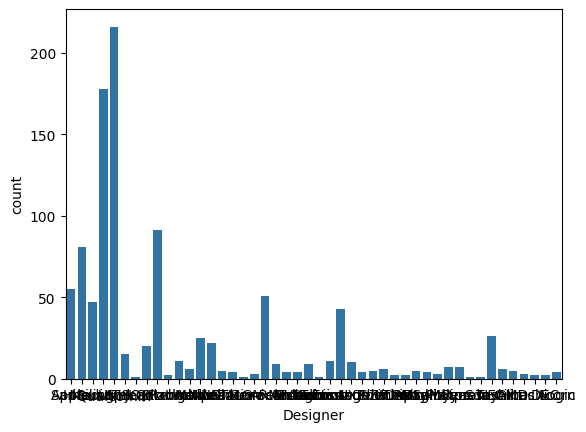

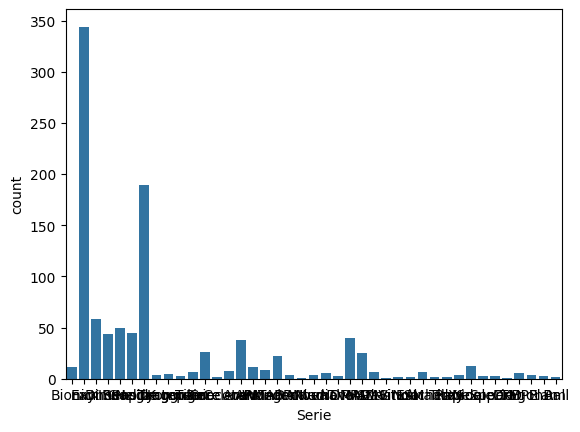

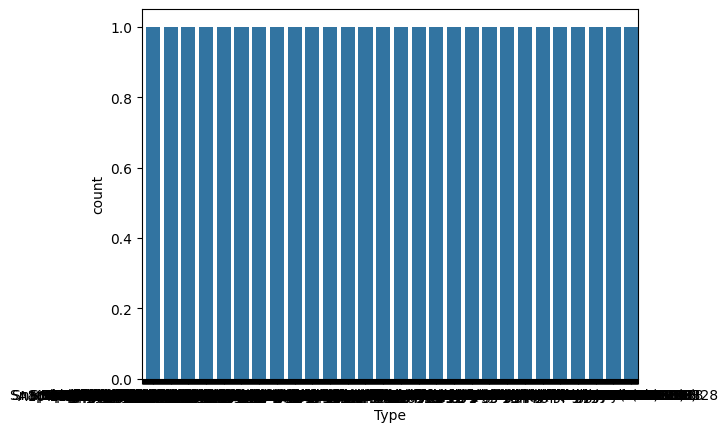

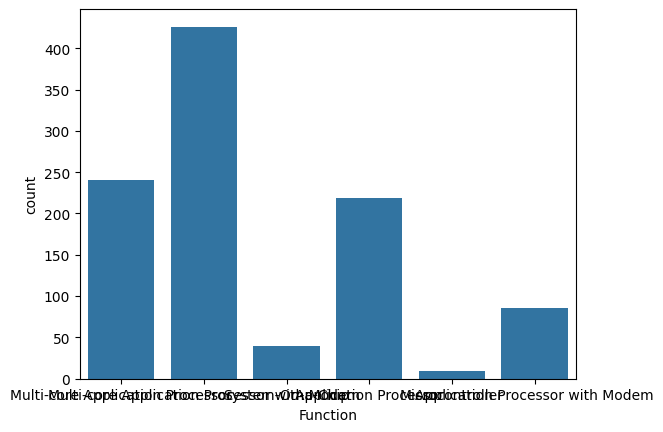

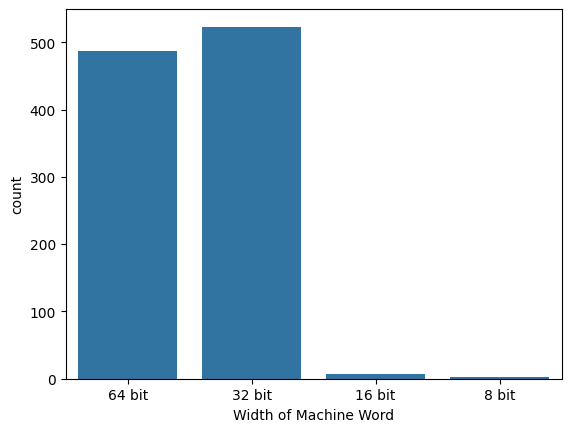

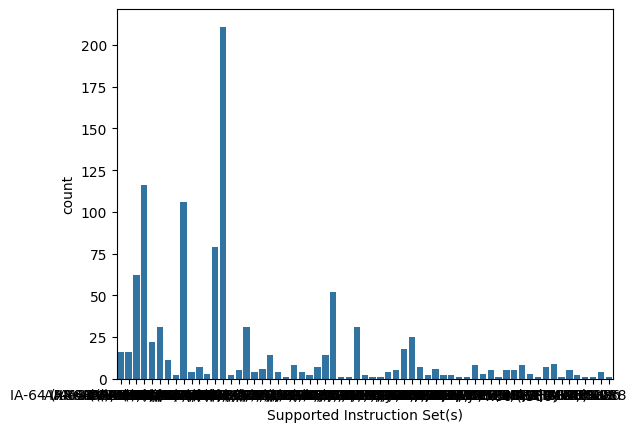

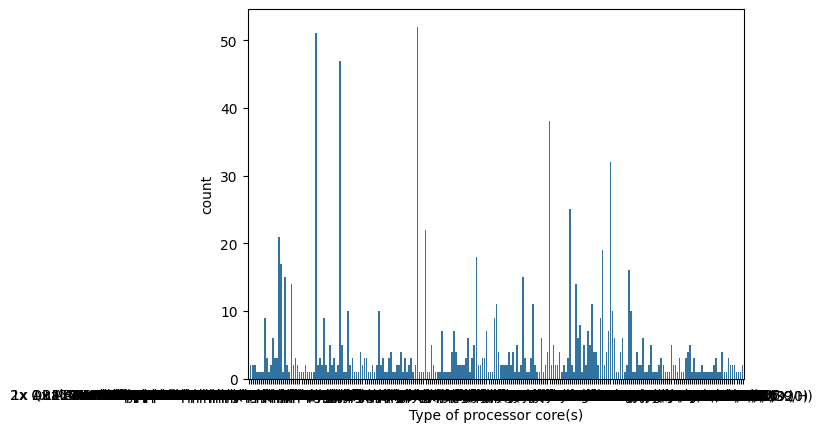

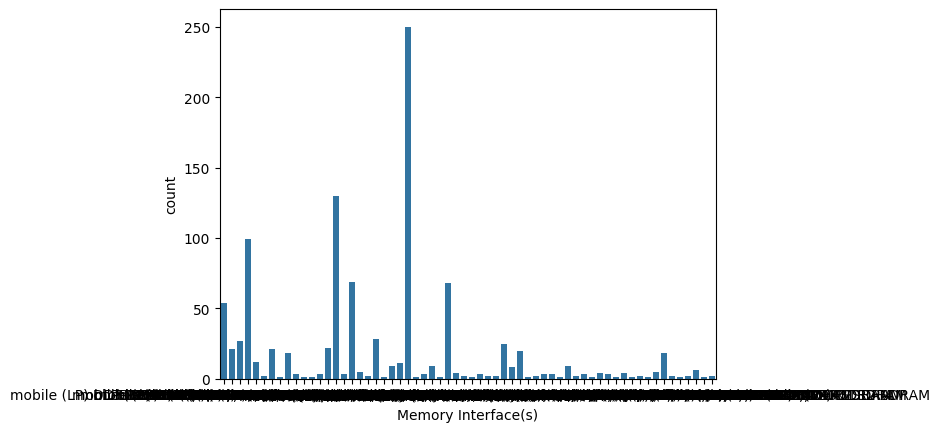

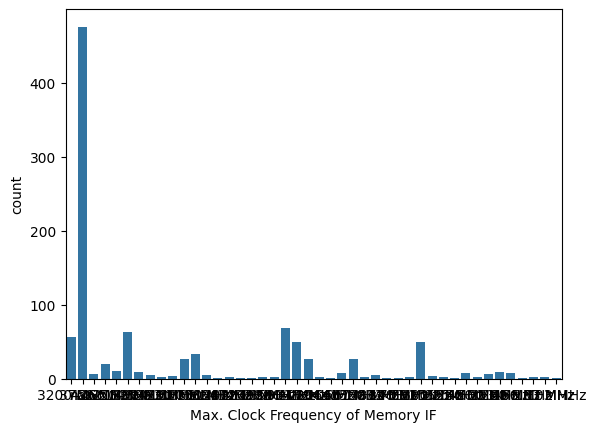

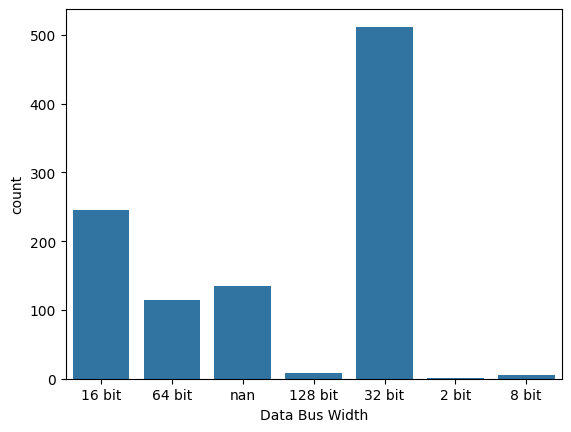

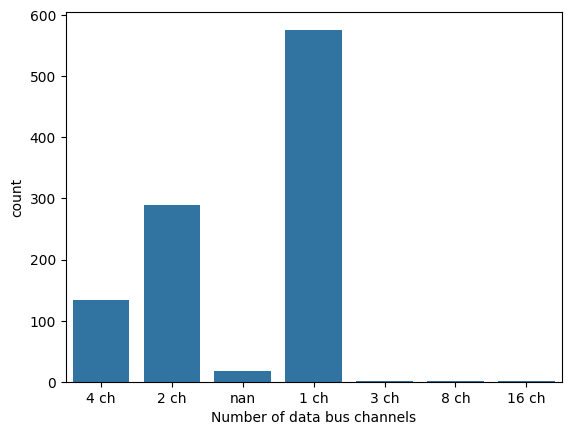

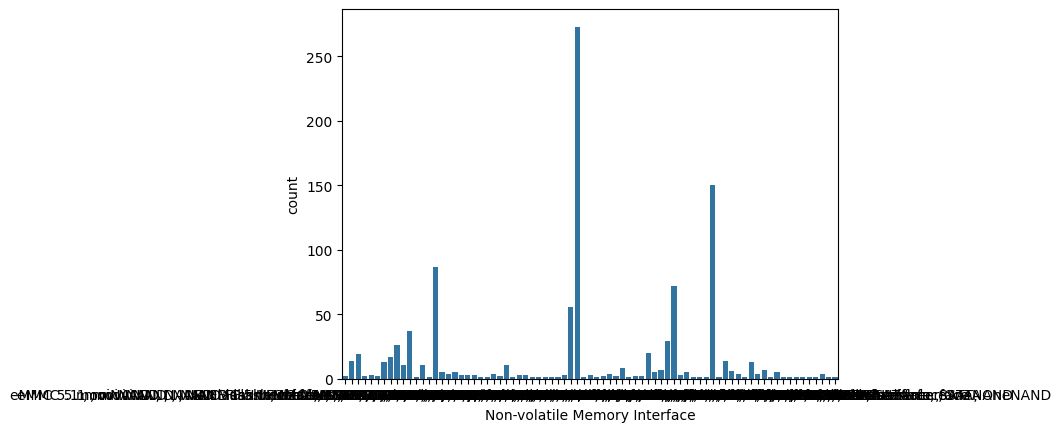

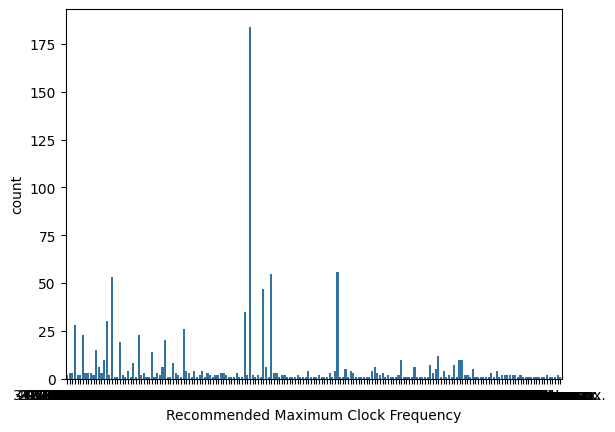

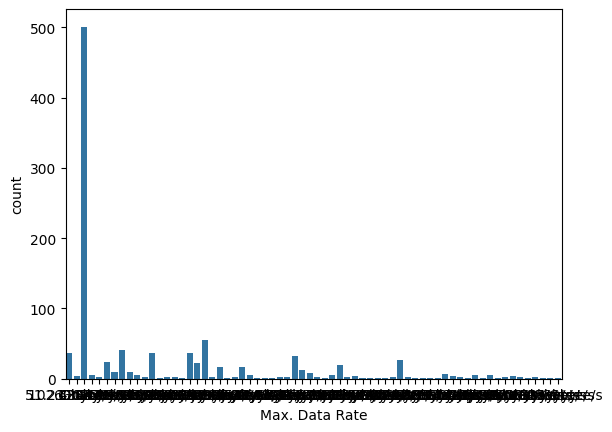

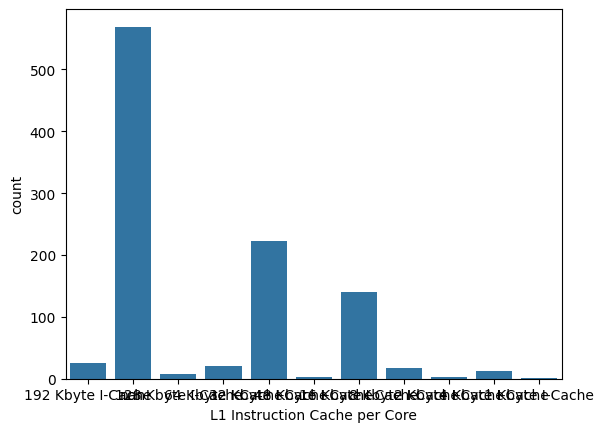

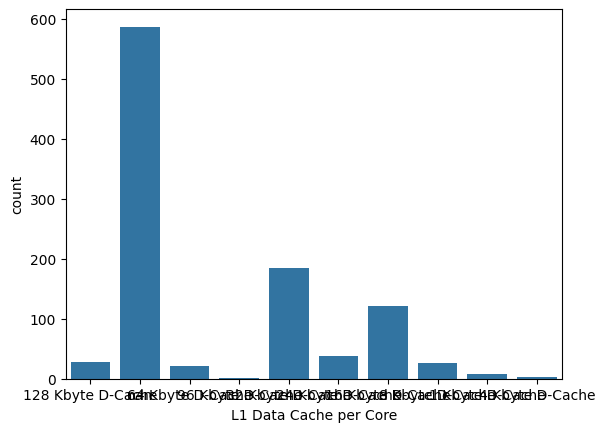

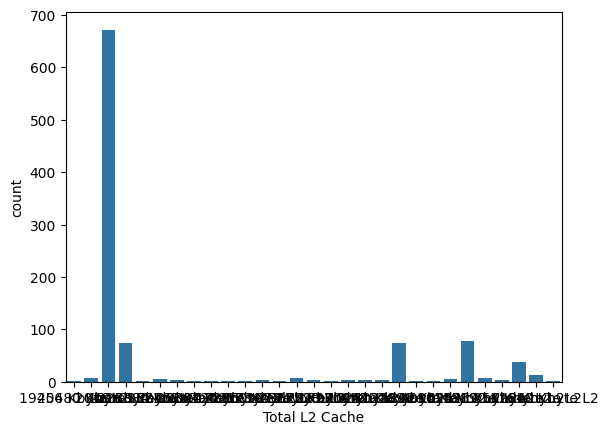

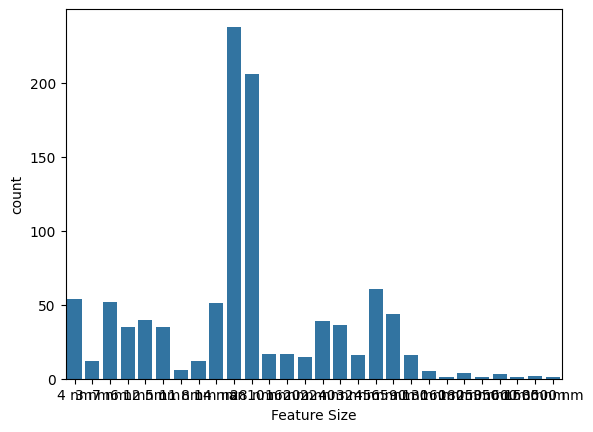

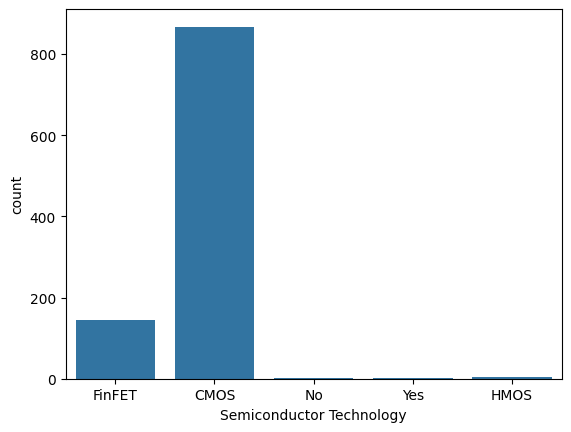

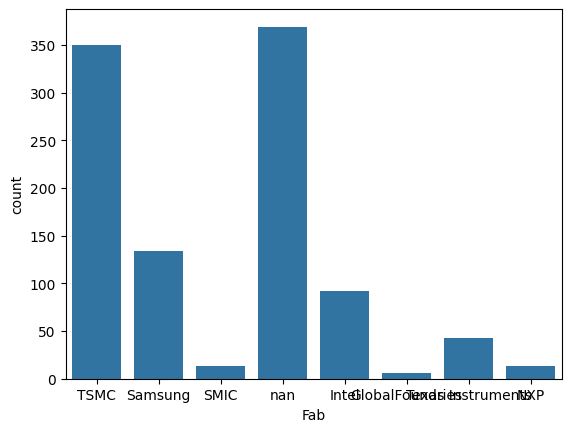

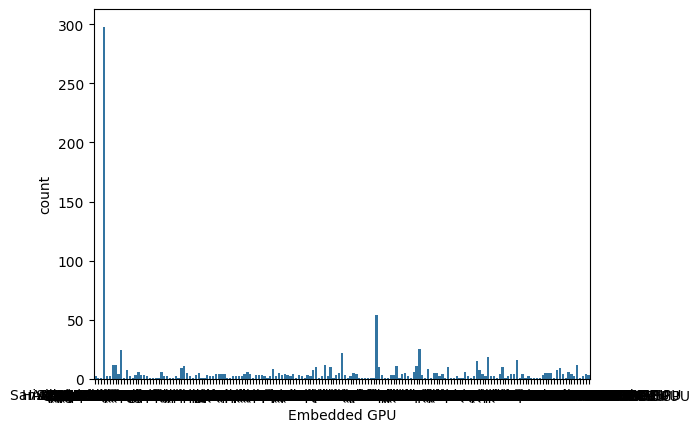

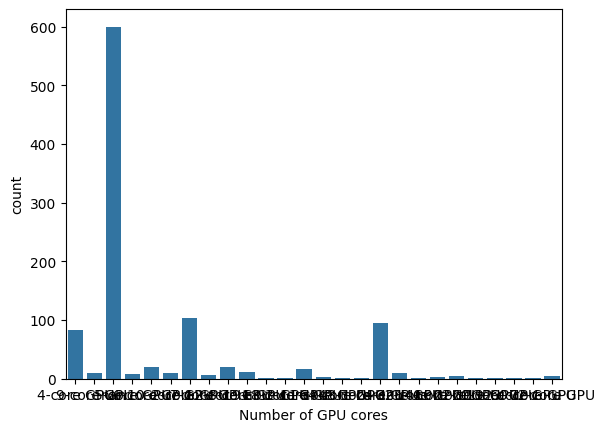

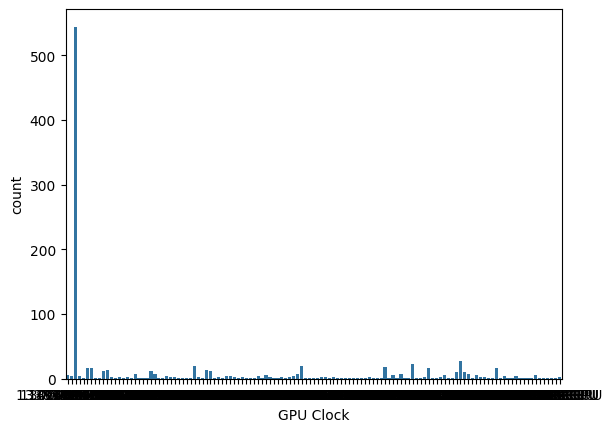

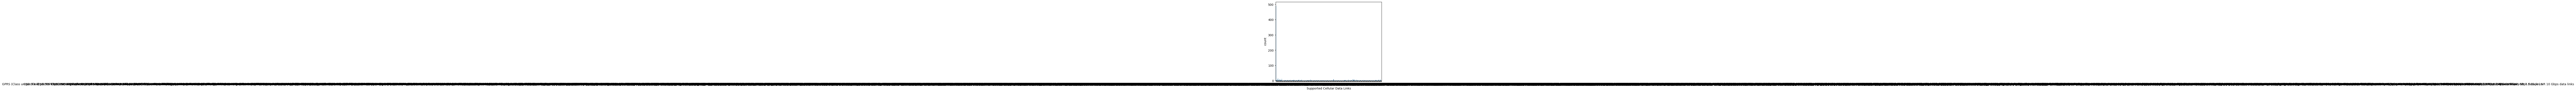

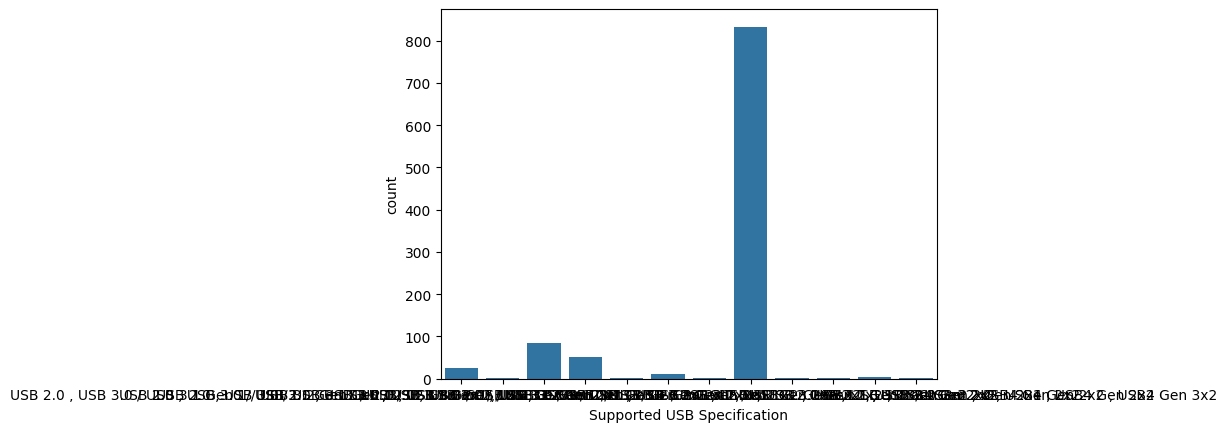

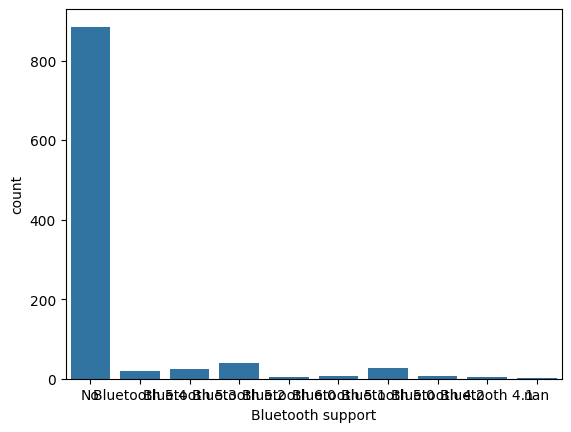

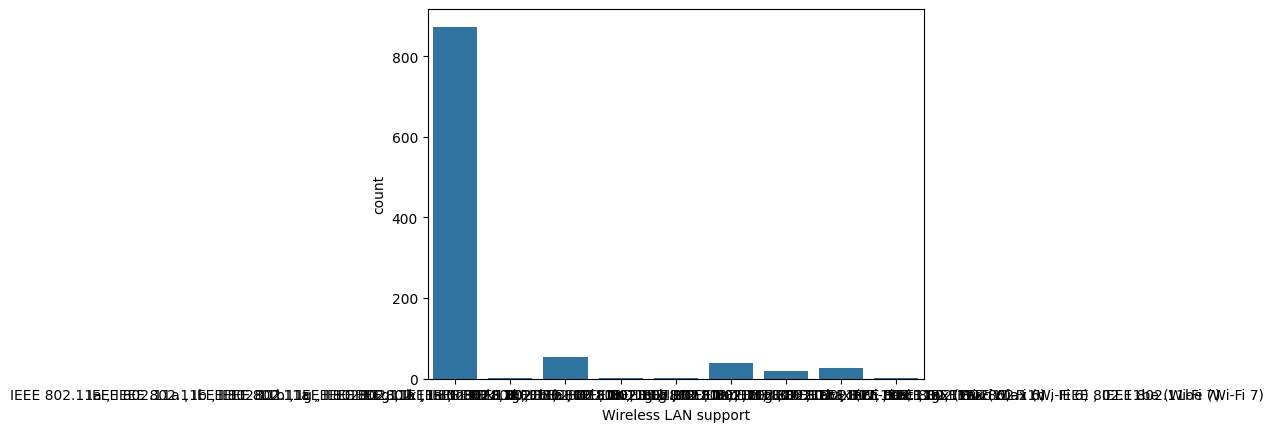

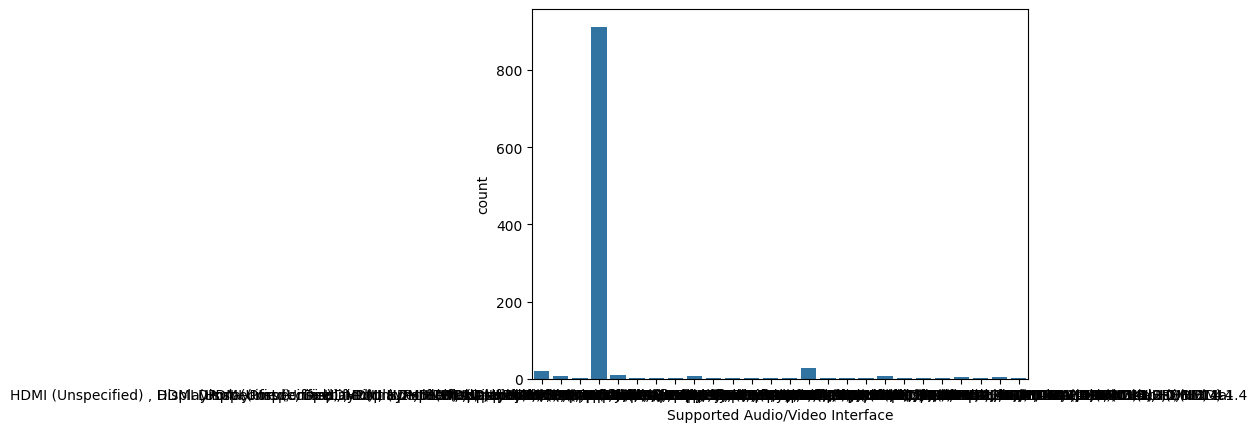

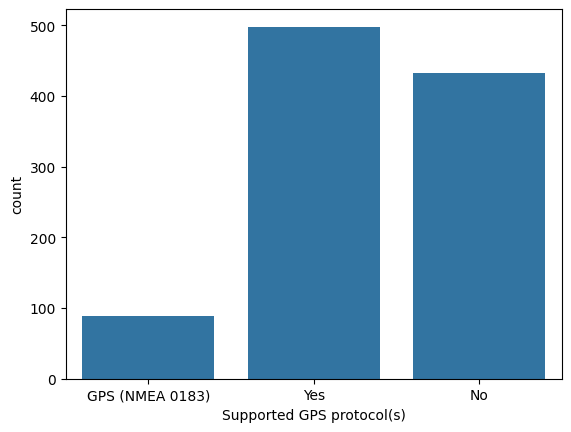

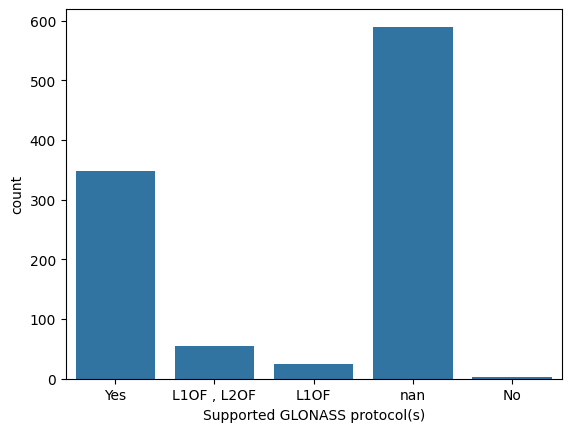

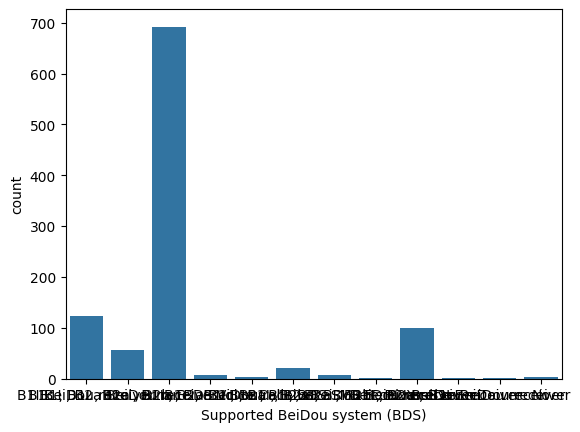

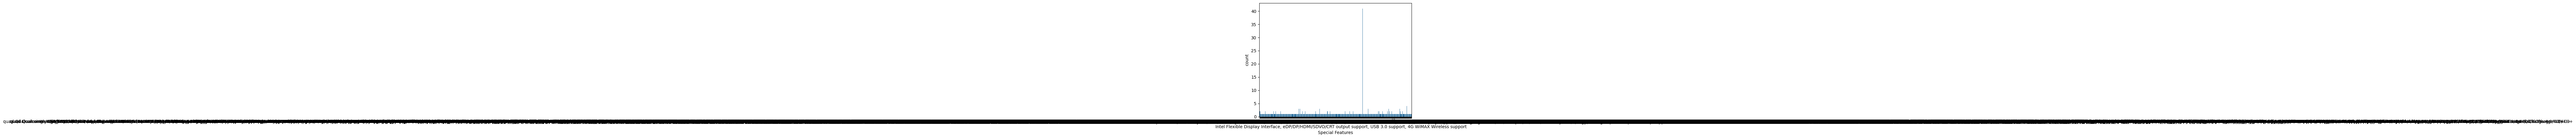

In [28]:
for col in obj_cols:
  sns.countplot(x=col, data=df)
  plt.show()

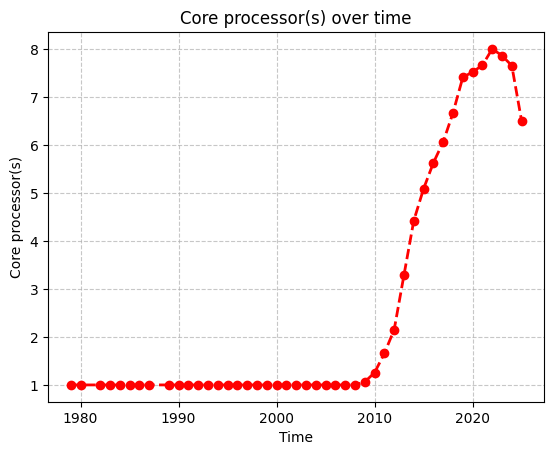

In [31]:
cores_years = df.groupby('Year Released')['Number of processor core(s)'].mean()

plt.plot(cores_years.index, cores_years.values, color='r', marker='o', linestyle='--', linewidth=2, markersize=6)
plt.xlabel('Time')
plt.ylabel('Core processor(s)')
plt.title('Core processor(s) over time')
plt.grid(linestyle='--', alpha=0.7)
plt.show()